# Titanic Survival Model

![titanic_image](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

This Project is aimed to create a model which can predict if a passenger survived a Titanic accident based on their data which consist of:
1.  PassengerId  (int64)  
2.  Survived     (int64)  
3.  Pclass       (int64)
4.  Name         (object)
5.  Sex          (object)
6.  Age          (float64)
7.  SibSp        (int64) 
8.  Parch        (int64)
9.  Ticket       (object) 
10. Fare         (float64)
11. Cabin        (object) 
12. Embarked     (object)

The outline of this project will consists of:
1. Data Preparation
2. Exploratory Data Analysis
3. Data Preprocessing and Feature Engineering
4. Modelling
5. Evaluation
6. Submission to Kaggle.

This project is based on competition being held on Kaggle which can be access using this link https://www.kaggle.com/c/titanic.





# Data Preparation
The data it self can be downloaded from Kaggle using which can be accessed using this link https://www.kaggle.com/c/titanic/data. But, the data had already been provided from my Github, therefore the link of the raw data already provided which can be accessed using pandas library. These are the links for:
1. Train data ('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/train.csv')
2. Test data ('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/test.csv')

In [3]:
import pandas as pd
import numpy as np
import math

In [4]:
# data frame for original data
titanic_train_ori = pd.read_csv('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/train.csv')
titanic_test_ori = pd.read_csv('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/test.csv')

# data frame from editing
titanic_train = titanic_train_ori.copy()
titanic_test = titanic_test_ori.copy()
titanic_train['train_test'] = 0
titanic_test['train_test'] = 1

titanic_all_ori = pd.concat([titanic_train, titanic_test]) 
titanic_all = titanic_all_ori.copy()

pd.set_option('display.max_rows', titanic_train.shape[0])

In [5]:
# check the data
display(titanic_train.head(5))
display(titanic_train.info())
display(titanic_train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.0


In [6]:
# separate data columns that is numeric and categorical
titanic_train_num = ['Age', 'SibSp', 'Parch', 'Fare']
titanic_train_cat = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

There 3 columns that contains missing data which are Age, cabin and Embarked.

In [7]:
# check percentage of missing values
missing_values = ['Age', 'Cabin', 'Embarked']
dict = {'ColumnName': [], 'MissingVals': [], '%': []}

for i in missing_values:
    dict['ColumnName'].append(i)
    dict['MissingVals'].append(titanic_train[i].isna().sum())
    dict['%'].append(titanic_train[i].isnull().sum()/len(titanic_train)*100)

df_missing_values=pd.DataFrame(dict)

In [8]:
df_missing_values

,ColumnName,MissingVals,%
0,Age,177,19.865320
1,Cabin,687,77.104377
2,Embarked,2,0.224467


We might be considering to drop 'Cabin' Column because there's so many missing values about 77%.

# Exploratory Data Analysis
This section contains data visualization and analysis to gain insights and characteristics of the data.

In [9]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot Data That are Numeric

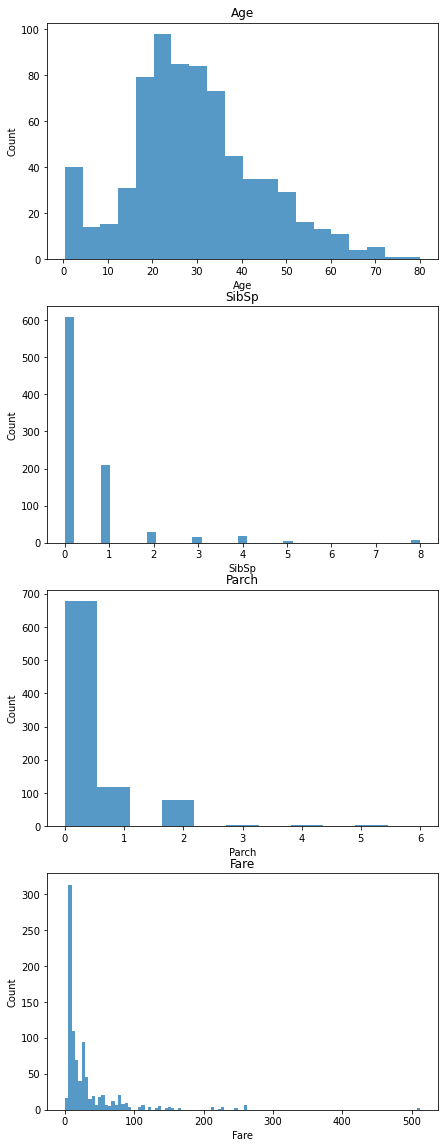

In [10]:
fig, ax = plt.subplots(nrows=len(titanic_train_num), figsize=[7, len(titanic_train_num)*5])

for i, col in enumerate(titanic_train_num):
    sns.histplot(titanic_train[col], linewidth=0, ax=ax[i])
    ax[i].set_title(col)
plt.show()

Based on the distribution of the data we can see that 'SibSp', 'Parch', and 'Fare' columns are are right skewed. This probem will be solved using scaling or normalization to decrease the standard deviation as well which affect our model if we didn't do so.

# Plot Data That are Categorical
The main reason is to see whether there are any categorical variables that needs feature engineering.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

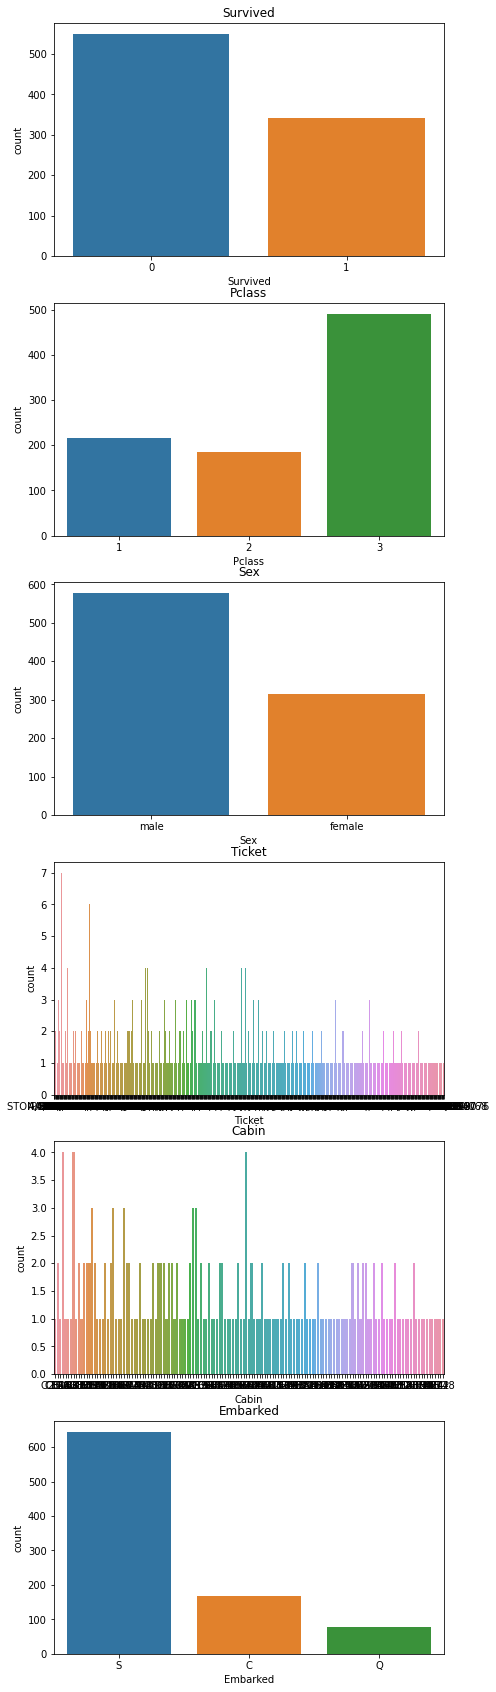

In [11]:
fig, ax = plt.subplots(nrows=len(titanic_train_cat), figsize=[7, len(titanic_train_cat)*5])

for i, col in enumerate(titanic_train_cat):
    sns.countplot(titanic_train[col], linewidth=0, ax=ax[i])
    ax[i].set_title(col)
plt.show()

Cabin and Ticket Columns need feature engineering because the data is too vary for the machine or even humans to interpret.

# Plot Other Feature
This part is for finding which feature that correlates to the survivality

## Plot Category Plot Survival Based On Sex

,Survived
Sex,
female,0.742038
male,0.188908


Male Survived Percentage 12.23 %
Male Not Survived Percentage 52.53 %

Female Survived Percentage 26.15 %
Female Not Survived Percentage 9.091 %


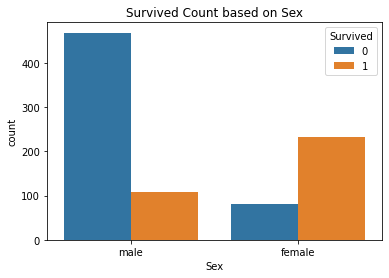

In [147]:
# Plot counting survival based on sex

sns.countplot(x='Sex', hue='Survived', data=titanic_train)\
              .set(title='Survived Count based on Sex')


# male and female survivability compare to each own gender

# (percentage how many female survived from all female passengers)
# female_percentage = female_survived.sum / female_passengers.count 

# (percentage how many male survived from all male passengers)
# male_percentage = male_survived.sum / female_passengers.count

display(pd.pivot_table(data=titanic_train,
               index='Sex',
               aggfunc={'Survived': np.mean}))

# male and female survivability percentage based compare to all passengers 
len_data = len(titanic_train)

bool_survived = titanic_train['Survived'] == 1
bool_not_survived = titanic_train['Survived'] == 0

bool_male = titanic_train['Sex'] == 'male'
bool_female = titanic_train['Sex'] == 'female'

bool_male_survived = titanic_train.loc[bool_survived & bool_male]
bool_male_not_survived = titanic_train.loc[bool_not_survived & bool_male]

bool_female_survived = titanic_train.loc[bool_survived & bool_female]
bool_female_not_survived = titanic_train.loc[bool_not_survived & bool_female]

# (percentage how many male survived from all passengers)
print('Male Survived Percentage', '{0:.4g}'.format(len(bool_male_survived)/len_data*100), '%')
# (percentage how many male not survived from all passengers)
print('Male Not Survived Percentage', '{0:.4g}'.format(len(bool_male_not_survived)/len_data*100), '%\n')
# (percentage how many female survived from all passengers)
print('Female Survived Percentage', '{0:.4g}'.format(len(bool_female_survived)/len_data*100), '%')
# (percentage how many female not survived from all passengers)
print('Female Not Survived Percentage', '{0:.4g}'.format(len(bool_female_not_survived)/len_data*100), '%')



From the plot, we can conclude that female has a higher chance of surviving in the titanic accident.

**From female passenger** *74,2%* survived the accident rather than **all male** which has a percentage of *18%*.

**From all passengers**:
1. *12.23%* of passengers which are **male survived**
1. *52.53%* of passengers which are **male not survived**
1. *26.15%* of passengers which are **female survived**
1. *9.09%* of passengers which are **female not survived**


## Heat Map Survived vs Pclass Columns

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


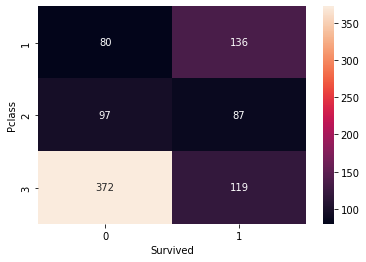

In [184]:
# Create a heat map Survived vs Pclass Columns
grouped_by_survived_pclass = titanic_train.groupby(['Pclass', 'Survived'])

# convert index survived to a column using unstack()
print(grouped_by_survived_pclass.size().unstack())

sns.heatmap(grouped_by_survived_pclass.size().unstack(), annot=True, fmt='d')


People on the first class has the highest chance of survivability.

## Countplot Sex vs Survived With Hue Pclass

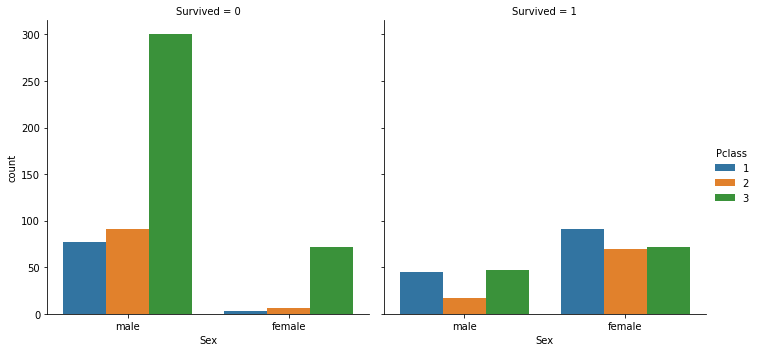

In [183]:
sns.catplot(x='Sex',
            hue='Pclass',
            col='Survived', 
            data=titanic_train,
            kind='count')

As we can see female at the first class (Pclass=1) has the highest chance of survivability. While male at the third class has the lowest chance of survivability. So far, female on the first class has the highest chance of survivability.


## Histplot Age vs Survived

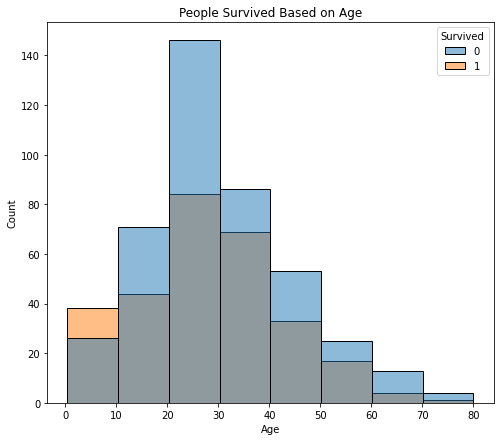

In [52]:
# Histplot Age vs Survived
plt.figure(figsize=[8,7])
plt.title('People Survived Based on Age')
hist_age_vs_survived = sns.histplot(x='Age',
                                    data=titanic_train ,
                                    hue='Survived',
                                    multiple='layer',
                                    bins=8)
plt.show()
  




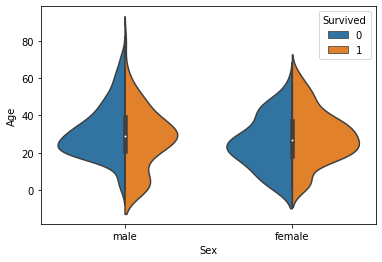

In [38]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic_train, split = True)

As we can see reasonable age that mostly survived the titanic is in range 20-30. People with younger age tend to survive rather that the old people.

Female in range of 20-45 years has high chance or survival. Male Children has a high chance of survival.

## Histplot Embarked vs Survived

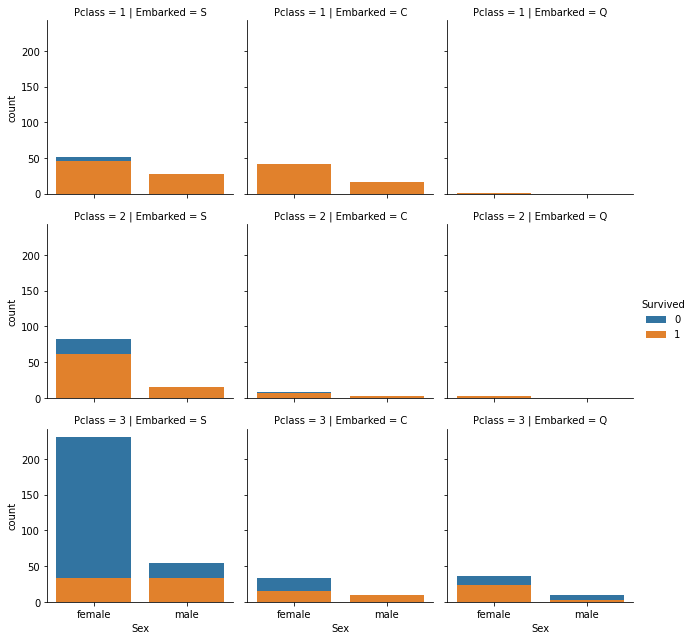

In [55]:
# plt.figure(figsize=[8,7])
# plt.title('People Survived Based on Embarked')
# hist_age_vs_survived = sns.histplot(x='Embarked',
#                                     data=titanic_train ,
#                                     hue='Survived',
#                                     multiple='layer',
#                                     bins=8)
# plt.show()

facet_grid_1 = sns.FacetGrid(titanic_train, 
                             row='Pclass', 
                             col='Embarked', 
                             hue='Survived')

facet_grid_1.map_dataframe(sns.countplot, x='Sex').add_legend()
sns.histplot()

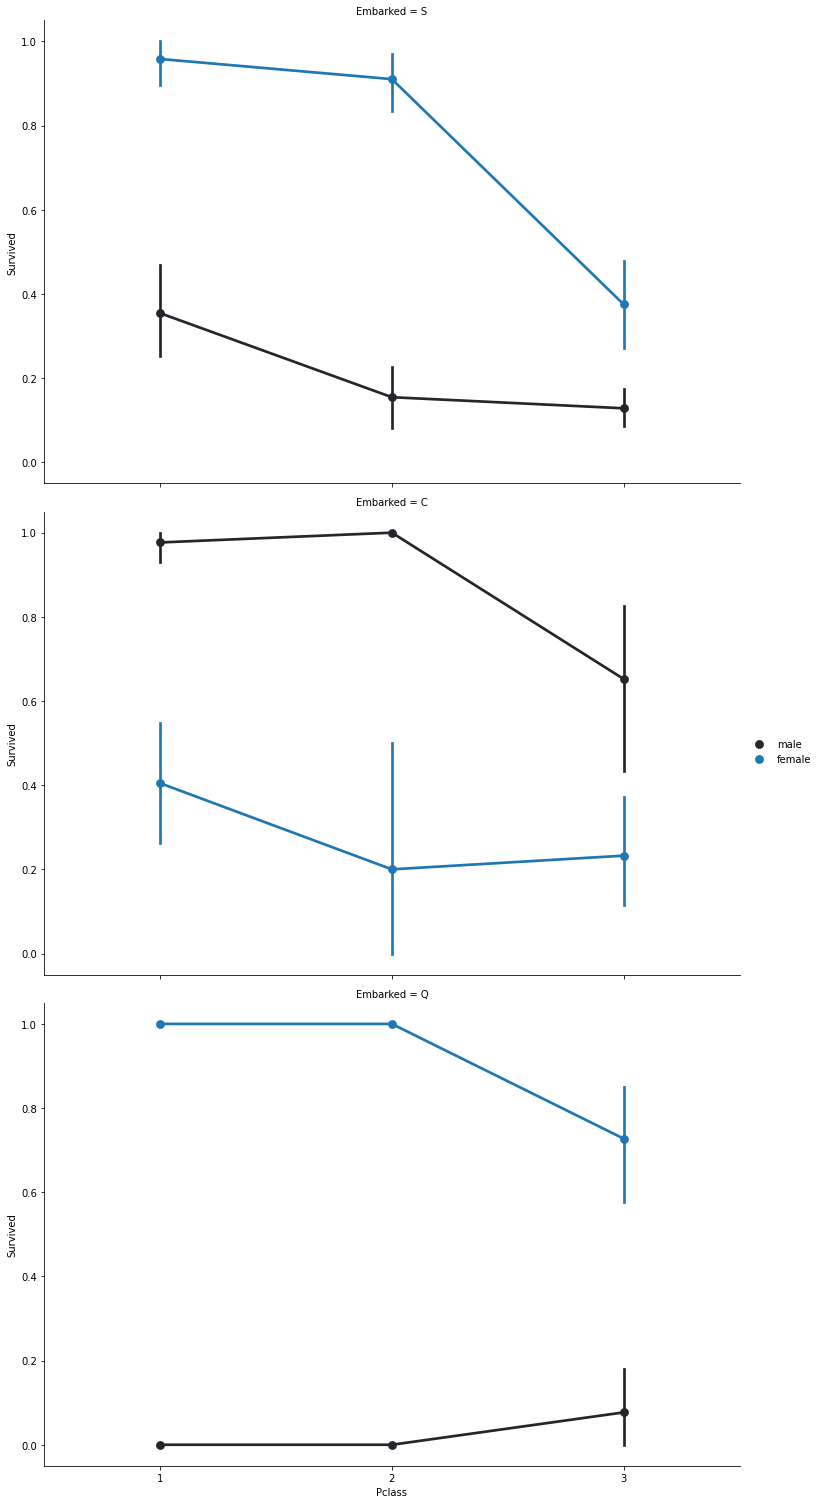

In [50]:
facetGrid1 = sns.FacetGrid(titanic_train, row='Embarked', height=7, aspect=1.5)
facetGrid1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
facetGrid1.add_legend()

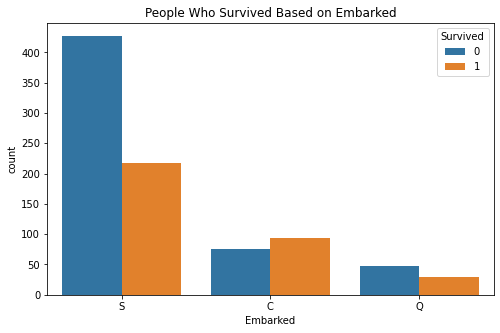

In [14]:
plt.figure(figsize=[8,5])
plt.title('People Who Survived Based on Embarked')
sns.countplot(x='Embarked', data=titanic_train, hue='Survived')

People who survived the most is the one who embarked from S.

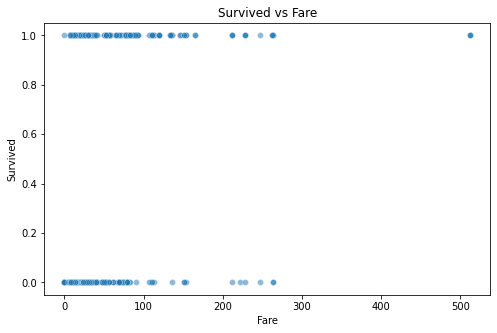

Embarked,C,Q,S
Survived,,,
0,35.443335,13.335904,20.743987
1,79.720926,13.182227,39.547081


In [15]:
plt.figure(figsize=[8,5])
plt.title('Survived vs Fare')
sns.scatterplot(x='Fare', y='Survived', data=titanic_train, alpha=0.5)
plt.show()

display(pd.pivot_table(titanic_train, index='Survived', columns='Embarked', values='Fare', aggfunc='mean'))

We can see that the mean for each people who survived has a higher Fare than those who not survived.

In [16]:
titanic_train['Ticket Code'] = titanic_train['Ticket'].apply(lambda x: x.split(' ')[0].replace('.', '').replace('/', ''))\
    .apply(lambda x: 'n' if x.isnumeric() else x)\
    .str.lower()

In [17]:
display(pd.pivot_table(titanic_train, index='Ticket Code', columns='Survived', values='PassengerId', aggfunc='count'))
display(pd.pivot_table(titanic_train, index='Ticket Code', columns='Survived', values='Fare', aggfunc='mean'))

Survived,0,1
Ticket Code,,
a4,7.0,NaN
a5,19.0,2.0
as,1.0,NaN
c,3.0,2.0
ca,27.0,14.0
casoton,1.0,NaN
fa,1.0,NaN
fc,1.0,NaN
fcc,1.0,4.0


Survived,0,1
Ticket Code,,
a4,12.500000,NaN
a5,9.349121,8.050000
as,8.050000,NaN
c,12.075000,7.195850
ca,36.980556,19.441071
casoton,10.500000,NaN
fa,7.312500,NaN
fc,52.000000,NaN
fcc,26.250000,21.000000


Looks like ticket code didn't provide enough evidence whether those with expensive ticket fare survive the titanic.

In [18]:
titanic_train['Cabin Code'] = titanic_train['Cabin'].apply(lambda x: str(x).split(' ')[0][0]).str.lower()
titanic_train['Cabin Count'] = titanic_train['Cabin'].apply(lambda x: len(str(x).split(' ')))

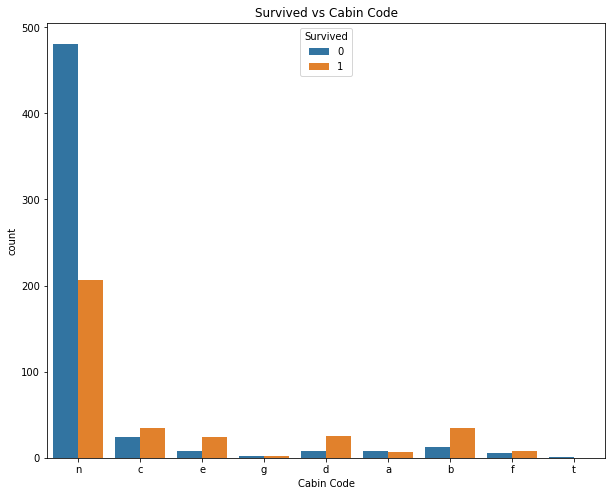

In [19]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Code')
sns.countplot(x='Cabin Code', data=titanic_train, hue='Survived')

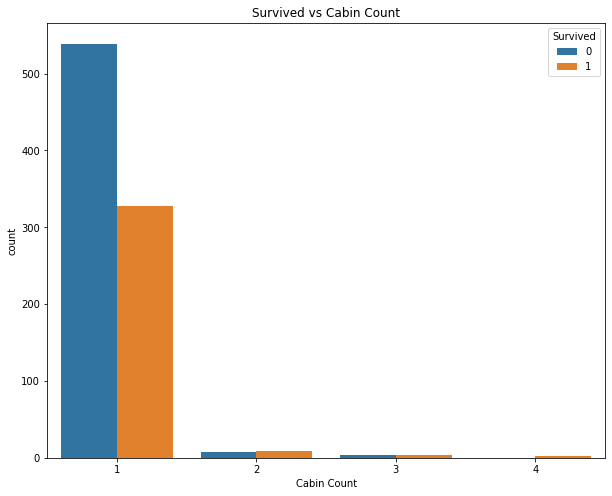

Survived,0,1
Cabin Count,,
1,539.0,328.0
2,7.0,9.0
3,3.0,3.0
4,NaN,2.0


Survived,0,1
Cabin Count,,
1,20.332002,42.060481
2,93.252971,132.479156
3,177.000000,346.109733
4,NaN,262.375000


In [20]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Count')
sns.countplot(x='Cabin Count', data=titanic_train, hue='Survived')
plt.show()
display(pd.pivot_table(titanic_train, index='Cabin Count', columns='Survived', values='Fare', aggfunc='count'))
display(pd.pivot_table(titanic_train, index='Cabin Count', columns='Survived', values='Fare', aggfunc='mean'))

Looks like people with multiple cabins (rich) most likely to survive but this doesn't ensure that. for example 4 cabins (all of them survive maybe they are a VIP that needs to be saved first) but others with 2 and 3 cabin has a slighly little change to survive

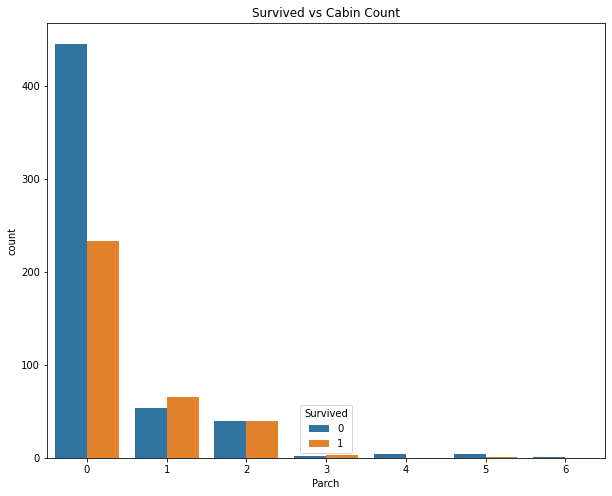

In [21]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Count')
sns.countplot(x='Parch', data=titanic_train, hue='Survived')
plt.show()

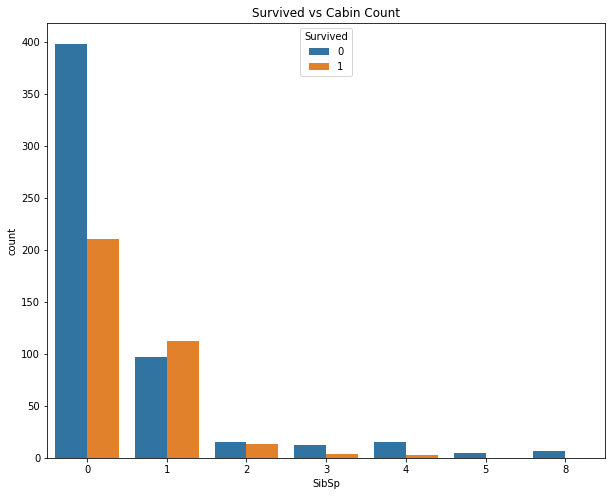

In [22]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Count')
sns.countplot(x='SibSp', data=titanic_train, hue='Survived')
plt.show()

One thing for sure that people who are travelling alone tend to survive because they only need to save themselves without worying others

In [23]:
titanic_train['title'] = titanic_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

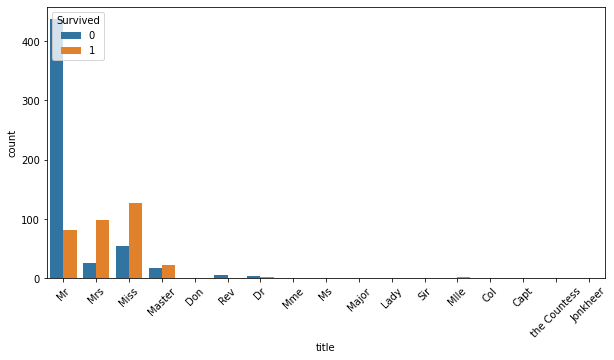

In [24]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
sns.countplot(x='title', hue='Survived',data=titanic_train)

In [25]:
print('Master = ', titanic_train['title'].isin(['Master']).sum())
print('Mr = ', titanic_train['title'].isin(['Mr']).sum())
print('Mrs = ', titanic_train['title'].isin(['Mrs']).sum())
print('Miss = ', titanic_train['title'].isin(['Miss']).sum())

Master =  40
Mr =  517
Mrs =  125
Miss =  182


We are going to change the title to a number where 'Mr' corresponds to 0, 'Mrs' corresponds to 1, 'Miss' corresponds to 2, 'Master' corresponds to 3 and others corresponds to 4

# Data Preprocessing 

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [27]:
titanic_all = titanic_all_ori.copy()
# Columns to be dropped
if 'Cabin' in titanic_all.columns:
    titanic_all.drop(labels=['Cabin'], axis=1, inplace=True)
    
# Replace title with numbers
embarked = {'S': 0, 'C':1, 'Q':2}
sex = {'male': 0, 'female': 1}
title = {'Master': 0, 'Mr': 1, 'Mrs': 2, 'Miss': 3}

#check mode of embarked for preprocessing
print(titanic_all['Embarked'].mode()[0])

S


In [28]:
titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.9+ KB


In [29]:
# convert Age columns into bins which each bin contain range of ages with difference of 10
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)

def encode_age(data):
    if (data>0 and data<=10):
        return 0
    if (data>10 and data<=20):
        return 1
    if (data>20 and data<=30):
        return 2
    if (data>30 and data<=40):
        return 3
    if (data>40 and data<=50):
        return 4
    if (data>50 and data<=60):
        return 5
    if (data>60 and data<=70):
        return 6
    else:
        return 7

# encode title to 0 for 'Master', 1 for 'Mr', 2 for 'Mrs', 3 for 'Miss' and lastly 4 for 'Others'
def encode_title(data):
  if data in title.keys():
    return title[data]
  else:
    return len(title)

In [30]:
titanic_all['Embarked'].mode()[0]

'S'

In [31]:
#fill embarked column with missing values and map it to number
encoder = LabelEncoder()

# Fill the missing value with the most frequent values inside the dataset which is 'S'
titanic_all['Embarked'].fillna(titanic_all['Embarked'].mode()[0], inplace=True)
titanic_all['Embarked'] = encoder.fit_transform(titanic_all['Embarked'])

#map sex column to number
titanic_all['Sex'] = encoder.fit_transform(titanic_all['Sex'])

#create title column and change it to number
titanic_all['Title'] = titanic_all['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# titanic_all['Title'] = encoder.fit_transform(titanic_all['Title'])
titanic_all['Title'] = titanic_all['Title'].apply(lambda x: encode_title(x))

#fill numeric missing value with mean of its column
titanic_all['Age'] = titanic_all['Age'].fillna(titanic_all['Age'].mean())
titanic_all['Age'] = titanic_train['Age'].apply(lambda x: encode_age(x))
titanic_all['Fare'] = titanic_all['Fare'].fillna(titanic_all['Fare'].mean())

X = titanic_all[titanic_all['train_test'] == 0]\
[['Pclass','Age', 'Fare', 'SibSp', 'Parch', 'Title', 'Embarked', 'Sex']]
y = titanic_all[titanic_all['train_test'] == 0]['Survived']

# Submission
X_submit = titanic_all[titanic_all['train_test'] == 1]\
[['Pclass','Age', 'Fare', 'SibSp', 'Parch', 'Title', 'Embarked', 'Sex']]

In [32]:
titanic_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7.2500,2,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,0,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,2,0,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,2,0,2
4,5,0.0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,2,0,1


In [33]:
from sklearn.model_selection import train_test_split
# Splot the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
X_train

array([[ 0.82956755, -0.26690459,  0.5138115 , ..., -0.62266185,
         0.58489231,  0.74242727],
       [-0.37094484, -0.26690459, -0.66256323, ..., -0.62266185,
         0.58489231,  0.74242727],
       [-1.57145722, -0.26690459,  3.95539858, ..., -0.62266185,
         0.58489231,  0.74242727],
       ...,
       [ 0.82956755,  1.25338396,  0.0532047 , ...,  0.43039097,
         0.58489231, -1.34693328],
       [-1.57145722,  1.25338396,  0.13909685, ..., -0.62266185,
         0.58489231,  0.74242727],
       [-1.57145722, -0.26690459, -0.10973011, ..., -0.62266185,
         0.58489231,  0.74242727]])

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [36]:
models = [RandomForestClassifier(), 
          KNeighborsClassifier(), 
          SVC(), 
          LogisticRegression(), 
          DecisionTreeClassifier()]
df_models = pd.DataFrame(columns=['Model', 'Accuracy'])

for m in models:
    m.fit(X_train, y_train)
    df_models = df_models.append({'Model': m.__class__.__name__, 
                                  'Accuracy': m.score(X_train, y_train)}, 
                                  ignore_index=True)

df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.952247
4,DecisionTreeClassifier,0.952247
1,KNeighborsClassifier,0.855337
2,SVC,0.853933
3,LogisticRegression,0.807584


In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [38]:
model = RandomForestClassifier()
parameters = {
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 3, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [50,100, 200, 400, 600, 800, 1000]
}
model_cv = RandomizedSearchCV(model, param_distributions=parameters, cv=5, scoring='accuracy')


In [39]:
model_cv.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
confusion_matrix(y_test, model_cv.best_estimator_.predict(X_test))

In [ ]:
model_cv.best_score_

In [ ]:
prediction = model_cv.best_estimator_.predict(X_submit)

In [ ]:
submit = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': prediction.astype(int)})

In [ ]:
submit

The test score on the kaggle competition is 0.77 which is not bad but there are some things that can be improved